**WORD CLOUD**

This is a basic tutorial on how to create a word cloud.

In [135]:
#First, let's install the package.
!pip3 install wordcloud==1.8.1

In [136]:
# import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [137]:
# import package and its set of stopwords
# we use the function set to remove any redundant stopwords.
from wordcloud import WordCloud, STOPWORDS

In [138]:
# open the file and read it into a variable techtrend_2022
# I used an article from The Washington Post website. 
# The article can be found at the following URL: https://www.washingtonpost.com/technology/2022/01/03/personal-tech-trends-2022-metaverse-chip-shortage/
# In this case, I didn't import the article directly via the URL, 
# but I copied the page and transformed it into *txt format via notepad.
# then, I uploaded and imported via pd.read_table function as follows: 
techtrend_2022 = pd.read_table('techtrends.txt')

In [139]:
# As we can see, the data is type object. We must convert to string to generate the word cloud.
techtrend_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 1 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   The biggest tech trends to watch for in 2022  49 non-null     object
dtypes: object(1)
memory usage: 520.0+ bytes


In [140]:
# Now, we can use the stopwords that we imported from word_cloud. 
# As said before, we use the function set to remove any redundant stopwords.
redundant = set(STOPWORDS)

In [141]:
# Create a word cloud object and generate a word cloud. 
# For simplicity, let's generate a word cloud using 5000 words in the article.
tech_wc = WordCloud(
    background_color='white',
    max_words=1000,
    stopwords=redundant
)


In [142]:
# Generate the word cloud
tech_wc.generate(str(techtrend_2022))


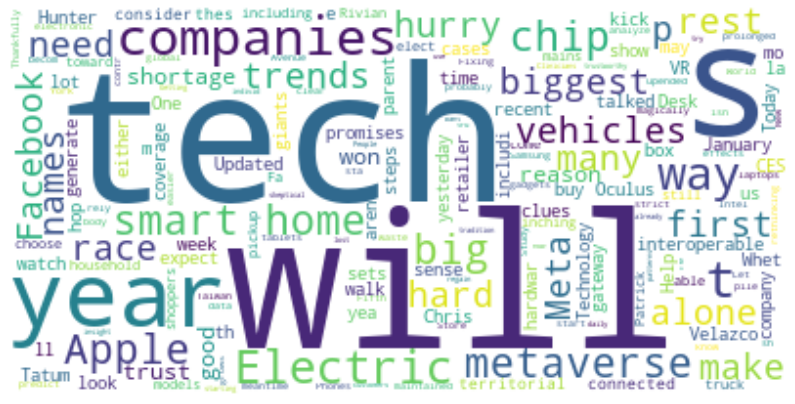

In [143]:
fig = plt.figure(figsize=(14, 18))
plt.imshow(tech_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [144]:
# However, some words aren't really informative words. So let's add it to our stopwords and re-generate the cloud.
redundant.add('will') 
redundant.add('companies')
redundant.add('year')
redundant.add('yesterday')
redundant.add('way')
redundant.add('ways')
redundant.add('S')
redundant.add('t')

In [145]:
# Generate the cloud, converting the data to string
tech_wc.generate(str(techtrend_2022))

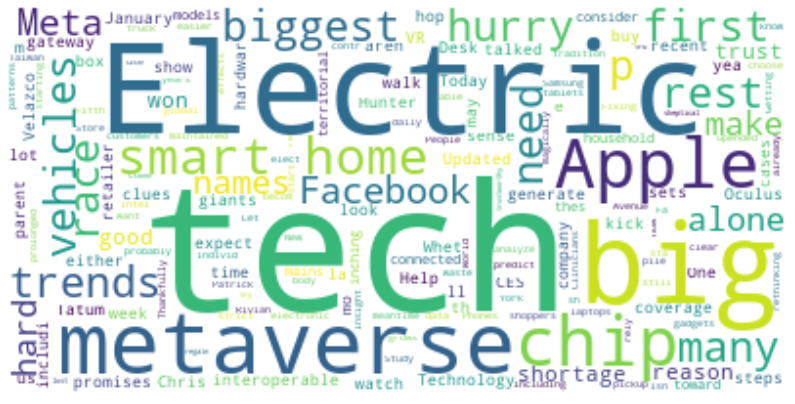

In [146]:
# Plot the word cloud and Voilà!
fig = plt.figure(figsize=(14, 18))
plt.imshow(tech_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [147]:
# Now, lets create a mask to superimpose the words onto a mask of heart shape.
# It can be done in any shape you wish.
# It's necessary to import some packages:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [148]:
# In this case, I downloaded a heart image from the internet.
# To create a word cloud with the shape of an image, you should find an image 
# that is suitable to be a mask for word clouds. 
# A maskable image should include “255” values for the “pure white” color within them. 
# Creating a mask in array format
heartmask = np.array(Image.open("word-cloud-mask.jpg"))
heartmask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [149]:
# Now we need to generate the word cloud and its proper definitions
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state=1, 
                      background_color='black', 
                      colormap='Set2', 
                      collocations=False, 
                      stopwords = redundant,                      
                      mask=heartmask).generate(str(techtrend_2022))


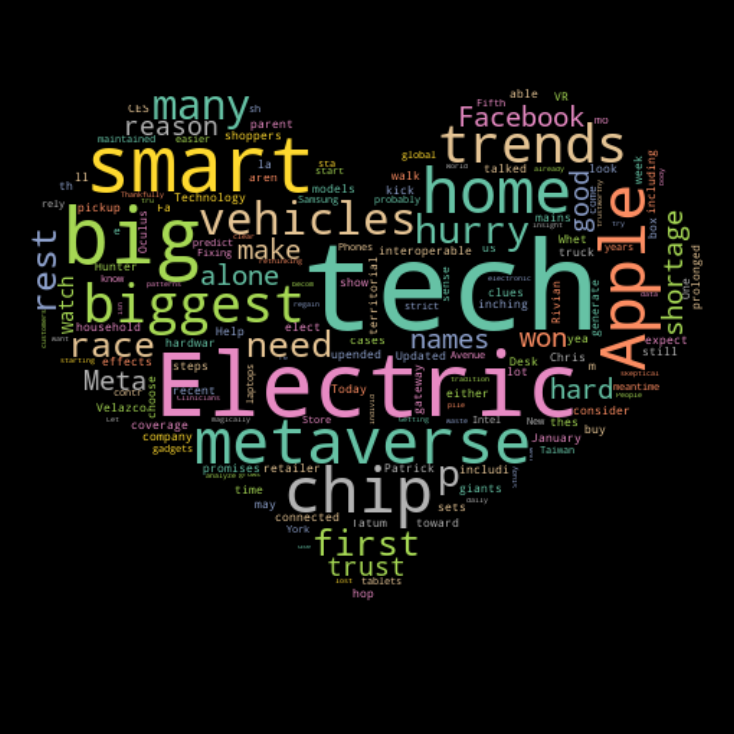

In [150]:
# And finally, plot the figure using Plotly library.
# In this case, I changed the background color to make the words stand out.
plt.figure(figsize=(10,10), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()
wordcloud.to_file("heart.jpg")

And ***Voilà***! I hope it have helped up. Feel free to contact me if anything goes wrong.
Thanks! ✌